# Assignment 2

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
path = '/home/emile/git/ecse415/A2/'

## 1. Harris Corner Detection

### Checkerboard Image

#### Derivatives

(Text(0.5, 1.0, 'I_y'), ([], []), ([], []))

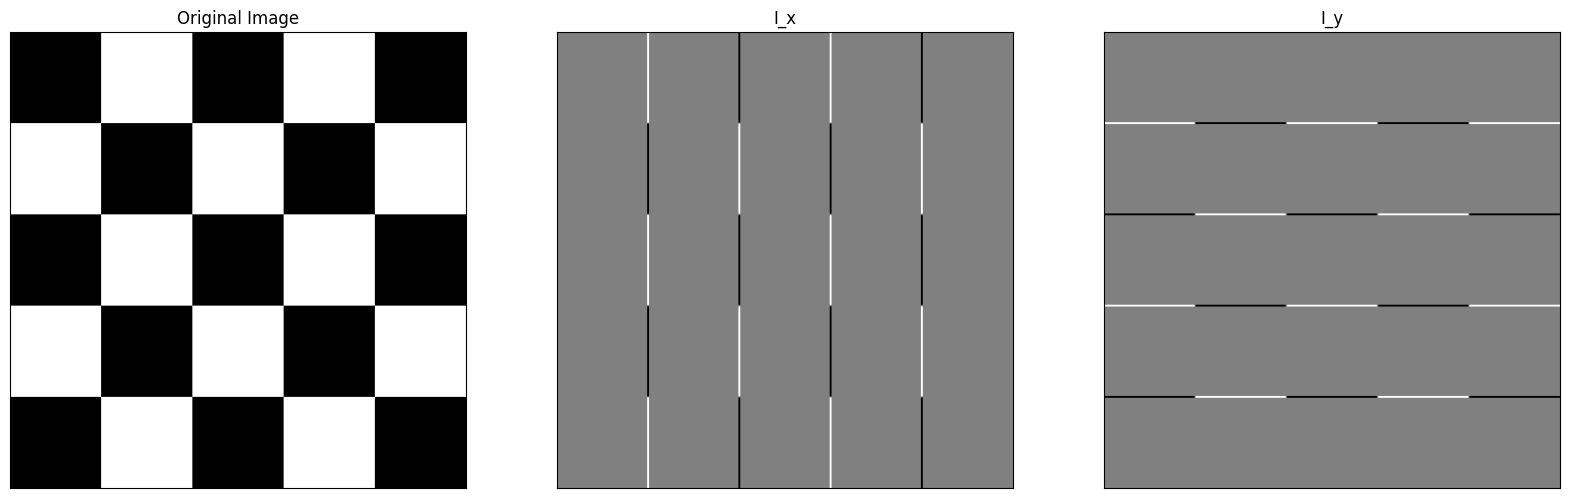

In [67]:
chk_img = cv2.imread(path+"Data/Q1/checkerboard.png")
# crh_img = cv2.imread(path+"Data/Q1/courthouse_gray.jpg")

gray = cv2.cvtColor(chk_img, cv2.COLOR_RGB2GRAY)

I_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(20, 30))
plt.subplot(131), plt.imshow(chk_img, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_x, cmap='gray')
plt.title("I_x"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_y, cmap='gray')
plt.title("I_y"), plt.xticks([]), plt.yticks([])

#### Square of Derivatives

(Text(0.5, 1.0, 'Ix_Iy'), ([], []), ([], []))

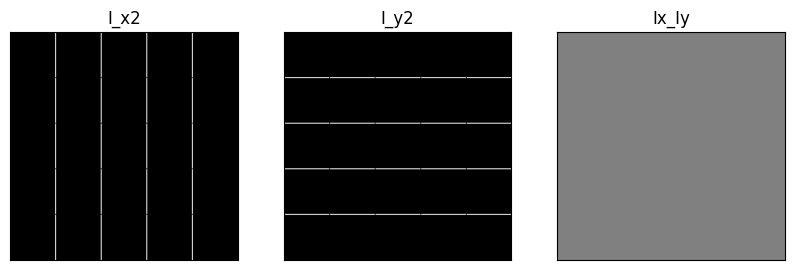

In [56]:
I_x2 = np.square(I_x)
I_y2 = np.square(I_y)
Ix_Iy = I_x * I_y

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(I_x2, cmap='gray')
plt.title("I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y2, cmap='gray')
plt.title("I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Ix_Iy, cmap='gray')
plt.title("Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Gaussian Filtering

(Text(0.5, 1.0, '5x5 Gaussian of Ix_Iy'), ([], []), ([], []))

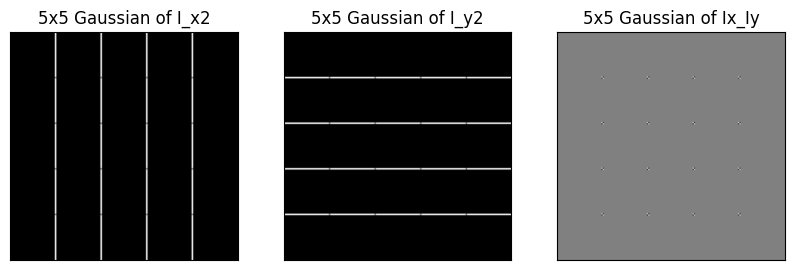

In [57]:
gauss_x = cv2.GaussianBlur(I_x2, (5,5), 0)
gauss_y = cv2.GaussianBlur(I_y2, (5,5), 0)
gauss_xy = cv2.GaussianBlur(Ix_Iy, (5,5), 0)

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(gauss_x, cmap='gray')
plt.title("5x5 Gaussian of I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gauss_y, cmap='gray')
plt.title("5x5 Gaussian of I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gauss_xy, cmap='gray')
plt.title("5x5 Gaussian of Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Cornerness function response

(Text(0.5, 1.0, 'Cornerness function response'), ([], []), ([], []))

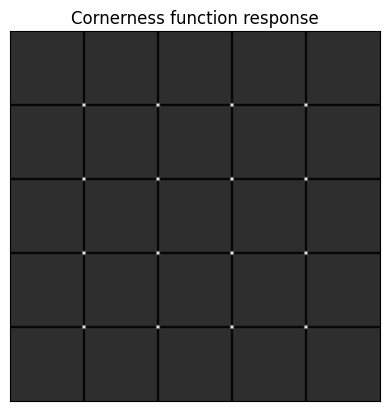

In [58]:
harr = gauss_x * gauss_y - np.square(gauss_xy) - 0.05 * np.square(gauss_x + gauss_y)

plt.imshow(harr, cmap='gray')
plt.title("Cornerness function response"), plt.xticks([]), plt.yticks([])

#### Non-maxima suppresion

(Text(0.5, 1.0, 'Non-maxima suppresion'), ([], []), ([], []))

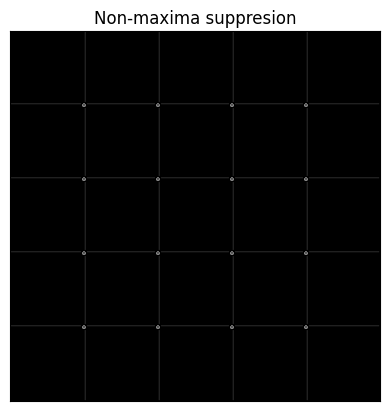

In [59]:
# Non-maxima suppresion function taken from tutorial 3:
def non_max_suppression(img_mag, img_phs):
    
    M, N = img_mag.shape
    Z = np.zeros((M,N), dtype=np.int32)
    
    # convert img_phs (radian) into angle image
    img_angle = img_phs * 180. / np.pi
    img_angle[img_angle < 0] += 180

    
    for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
        for j in range(1,N-1): # as for boundary pixels one of its neighbourhood pixel is not defined
            
            # store neighbourhood pixels in variables q and r
            q = 255
            r = 255

            #angle 0
            if (0 <= img_angle[i,j] < 22.5) or (157.5 <= img_angle[i,j] <= 180):
                q = img_mag[i, j+1]
                r = img_mag[i, j-1]
            #angle 45
            elif (22.5 <= img_angle[i,j] < 67.5):
                q = img_mag[i+1, j-1]
                r = img_mag[i-1, j+1]
            #angle 90
            elif (67.5 <= img_angle[i,j] < 112.5):
                q = img_mag[i+1, j]
                r = img_mag[i-1, j]
            #angle 135
            elif (112.5 <= img_angle[i,j] < 157.5):
                q = img_mag[i-1, j-1]
                r = img_mag[i+1, j+1]

            # if pixel magnitude is higher than both its neighbour than keep     
            if (img_mag[i,j] >= q) and (img_mag[i,j] >= r):
                Z[i,j] = img_mag[i,j]
            # otherwise make its value to 0
            else:
                Z[i,j] = 0
    
    return Z

# gradient calculation function taken from tutorial 3:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = cv2.filter2D(img, cv2.CV_64F, Kx)
    Iy = cv2.filter2D(img, cv2.CV_64F, Ky)
        
    # compute sobel Magnitude/Phase
    Im = cv2.magnitude(Ix, Iy)
    Im = Im / Im.max() * 255
    Ip = cv2.phase(Ix, Iy)    

    return (Im, Ip)

mag, phs = sobel_filters(harr)
nms = non_max_suppression(mag, phs)

plt.imshow(nms, cmap='gray')
plt.title("Non-maxima suppresion"), plt.xticks([]), plt.yticks([])

#### Result

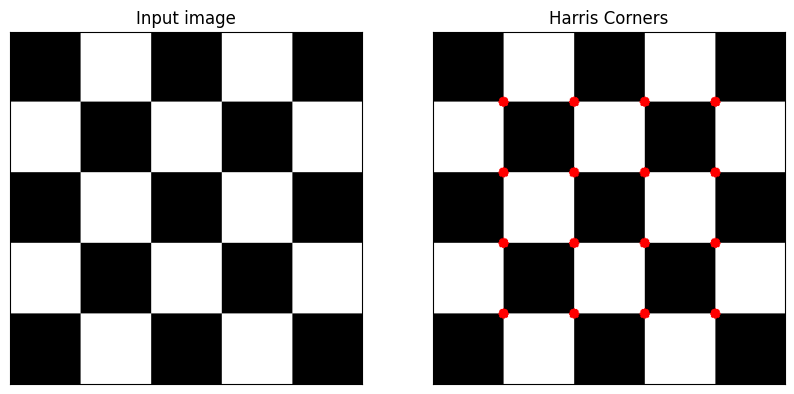

In [76]:
cv2.normalize(nms, nms, 0, 2, cv2.NORM_MINMAX)

thresh = 1.0

loc = np.where(nms >= thresh)
chk_img_cp = chk_img.copy()
for pt in zip(*loc[::-1]):
    cv2.circle(chk_img_cp, pt, 5, (255,0,0), -1)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(chk_img, cmap='gray')
plt.title("Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(chk_img_cp, cmap='gray')
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()